## Project: James Bond

In [207]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff

In [355]:
df = pd.read_csv('jamesbond.csv')
df.head(3)

,Year,Movie,Bond,Director,Composer,Writer,Cinematographer,Depicted_Film_Loc,Shooting_Loc,Bond_Car_MFG,...,Film_Length,Avg_User_IMDB,Avg_User_Rtn_Tom,Conquests,Martinis,BJB,Kills_Bond,Kills_Others,Top_100,Video_Game
0,1962,Dr. No,Sean Connery,Terence Young,Monty Norman,"Richard Maibaum, Johanna Harwood & Berkely Mather",Ted Moore,"Great Britain, Jamaic","England, Jamaica",Sunbeam,...,110,7.30,7.70,3,2,1,4,8,0,0
1,1963,From Russia with Love,Sean Connery,Terence Young,John Barry,Richard Maibaum & Johanna Harwood,Ted Moore,"United Kingdom, Great Britain, Turkey, Croatia...","England, Scotland, Italy, Switzerland, Turkey",Bently,...,115,7.50,8.00,4,0,0,11,16,0,1
2,1964,Goldfinger,Sean Connery,Guy Hamilton,John Barry,Richard Maibaum & Paul Dehn,Ted Moore,"United States, Great Britain, Switzerland","England, Switzerland, United States",Aston Martin,...,110,7.80,8.40,2,1,2,9,68,1,1


## Clean up data

In [358]:
bond = df.get(['Year','Movie','Bond','World_Adj','Budget_Adj','Avg_User_IMDB','Avg_User_Rtn_Tom','Shooting_Loc'])
bond

,Year,Movie,Bond,World_Adj,Budget_Adj,Avg_User_IMDB,Avg_User_Rtn_Tom,Shooting_Loc
0,1962,Dr. No,Sean Connery,457928,7688,7.30,7.70,"England, Jamaica"
1,1963,From Russia with Love,Sean Connery,598624,15174,7.50,8.00,"England, Scotland, Italy, Switzerland, Turkey"
2,1964,Goldfinger,Sean Connery,935404,22468,7.80,8.40,"England, Switzerland, United States"
3,1965,Thunderball,Sean Connery,1040693,66333,7.00,6.80,"England, France, Bahamas, United States"
4,1967,You Only Live Twice,Sean Connery,775740,66035,6.90,6.30,"Japan, Spain, Norway"
5,1969,On Her Majesty's Secret Service,George Lazenby,518736,50608,6.80,6.70,"England, Switzerland, Portugal"
6,1971,Diamonds Are Forever,Sean Connery,664969,41274,6.70,6.30,"England, France, Germany, Netherlands, United ..."
7,1973,Live and Let Die,Roger Moore,846046,36603,6.80,5.90,"England, United States, Jamaica"
8,1974,The Man with the Golden Gun,Roger Moore,459623,32965,6.70,5.10,"England, Thailand, Hong Kong, Portugal"
9,1977,The Spy Who Loved Me,Roger Moore,710290,53636,7.10,6.80,"England, Switzerland, Canada, Scotland, Egypt,..."


## Rating over the year

Text(0, 0.5, 'Average Rating')

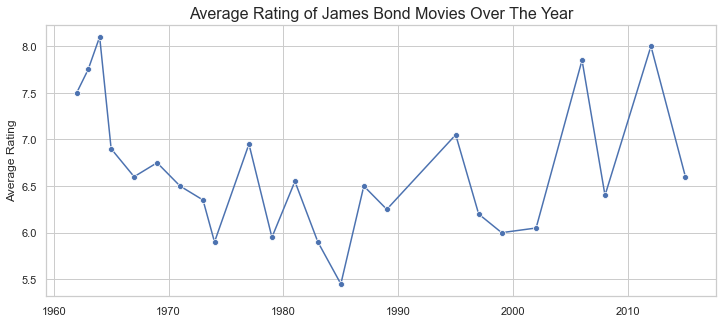

In [353]:
rating = 0.5*(bond.get('Avg_User_IMDB')+bond.get('Avg_User_Rtn_Tom'))
bond = bond.assign(Avg_Rating=rating)
sns.set_theme(style="whitegrid")
f, ax = plt.subplots(figsize=(12, 5))
sns.lineplot(data=bond, x="Year", y="Avg_Rating", marker='o').set_title('Average Rating of James Bond Movies Over The Year', fontsize="16")
plt.xlabel('')
plt.ylabel('Average Rating', fontsize = '12')

## Who is the most favorite Bond? 

In [345]:
bond_rate = bond.groupby('Bond').mean().sort_values('Avg_Rating', ascending=False).get(['Avg_Rating'])
bond_rate

,Avg_Rating
Bond,
Sean Connery,7.23
Daniel Craig,7.21
George Lazenby,6.75
Timothy Dalton,6.38
Pierce Brosnan,6.33
Roger Moore,6.15


In [346]:
bond.get(['Year','Bond','Avg_User_IMDB','Avg_User_Rtn_Tom','Avg_Rating'])

,Year,Bond,Avg_User_IMDB,Avg_User_Rtn_Tom,Avg_Rating
0,1962,Sean Connery,7.30,7.70,7.50
1,1963,Sean Connery,7.50,8.00,7.75
2,1964,Sean Connery,7.80,8.40,8.10
3,1965,Sean Connery,7.00,6.80,6.90
4,1967,Sean Connery,6.90,6.30,6.60
5,1969,George Lazenby,6.80,6.70,6.75
6,1971,Sean Connery,6.70,6.30,6.50
7,1973,Roger Moore,6.80,5.90,6.35
8,1974,Roger Moore,6.70,5.10,5.90
9,1977,Roger Moore,7.10,6.80,6.95


## How well do Bond movies do commercialy?

Text(0, 0.5, '')

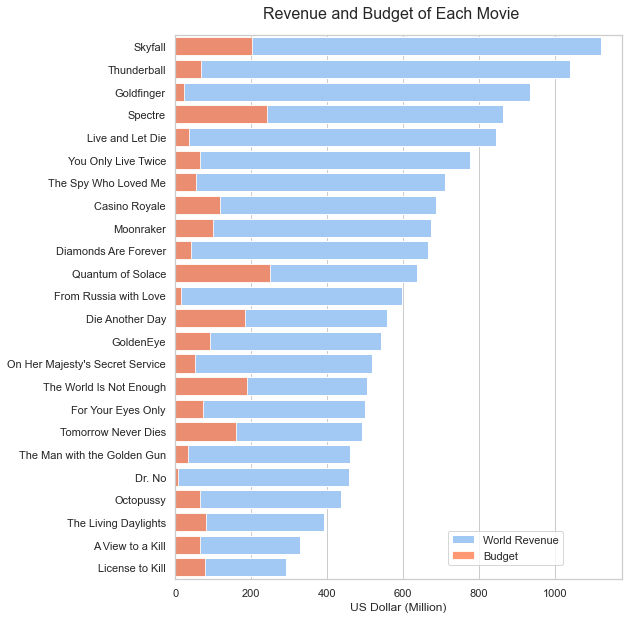

In [337]:
bond = bond.assign(World_Adj2=bond.get(['World_Adj'])/1e3, Budget_Adj2=bond.get(['Budget_Adj'])/1e3 )
sns.set_theme(style="whitegrid")
f=plt.figure(figsize=(8, 10))
sns.set_color_codes('pastel')
sns.barplot(data=bond.sort_values(by='World_Adj', ascending=False), x='World_Adj2', y='Movie', color='b' ,
            saturation = 1, label='World Revenue') #palette='crest'
sns.barplot(data=bond.sort_values(by='World_Adj', ascending=False), x='Budget_Adj2', y='Movie', 
            color='coral', saturation = 1, label='Budget', alpha=0.8) #palette='flare'
f.legend(ncol=1, loc="lower right", frameon=True, borderaxespad=6)
#f.set(ylabel="", xlabel="US dollars", title="Budget vs. Revenue of each Movie")
f.suptitle('Revenue and Budget of Each Movie', fontsize= 16, y=0.92)
plt.xlabel("US Dollar (Million)\n ")
plt.ylabel('')

Text(0.5, 0.92, 'Revenue/Budget Ratio of Each Movie')

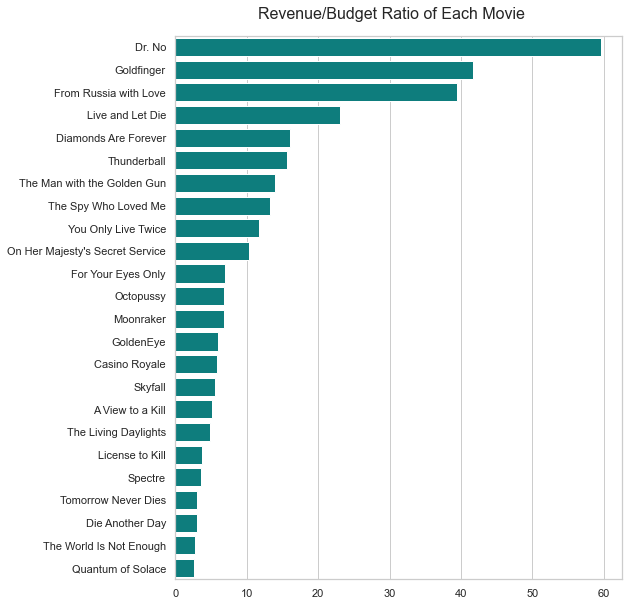

In [338]:
from IPython.display import display
pd.options.display.float_format = '{:,.2f}'.format
bond = bond.assign(ratio=bond.get('World_Adj')/bond.get('Budget_Adj'))
f=plt.figure(figsize = (8, 10))
sns.set_color_codes('pastel')
sns.barplot(data=bond.sort_values(by='ratio', ascending=False), x='ratio', y='Movie', color='darkcyan',
            saturation = 0.8, label='World Revenue').set(xlabel=None, ylabel=None)
f.suptitle('Revenue/Budget Ratio of Each Movie', fontsize= 16, y=0.92)

## Shooting Location in Bond Movies

In [343]:
all_movie_loc = bond.get('Shooting_Loc')
loc_list = []
for i in range(0, len(all_movie_loc)-1):
    each_movie_loc = all_movie_loc[i].split(',')
    loc_list = loc_list + each_movie_loc
loc_list = ['United Kingdom' if x=='England' else x for x in loc_list]
yy = np.unique(loc_list, return_counts=True)
df_loc = pd.DataFrame(yy[0],yy[1])
df_loc = pd.DataFrame().assign(Country=loc_list, Appearance=loc_list).groupby('Country').count().reset_index()
df_loc.sort_values(by='Appearance')

,Country,Appearance
12,Guatemala,1
22,Morocco,1
21,Monaco,1
20,Mexico,1
37,Mexico,1
18,Japan,1
27,Puerto Rico,1
15,India,1
28,Russia,1
13,Hong Kong,1


In [340]:
px.choropleth(df_loc,
              locations = 'Country',
              locationmode= 'country names',
              color = 'Appearance',
              hover_name = 'Country',
              hover_data = {'Country': False},
              title = 'Locations in James Bond movies',
              color_continuous_scale = px.colors.sequential.Redor,
              #projection='equirectangular'
)